C:\Users\dakoluk\AppData\Local\Temp\ipykernel_15944\789604385.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Mismatched country names:
set()


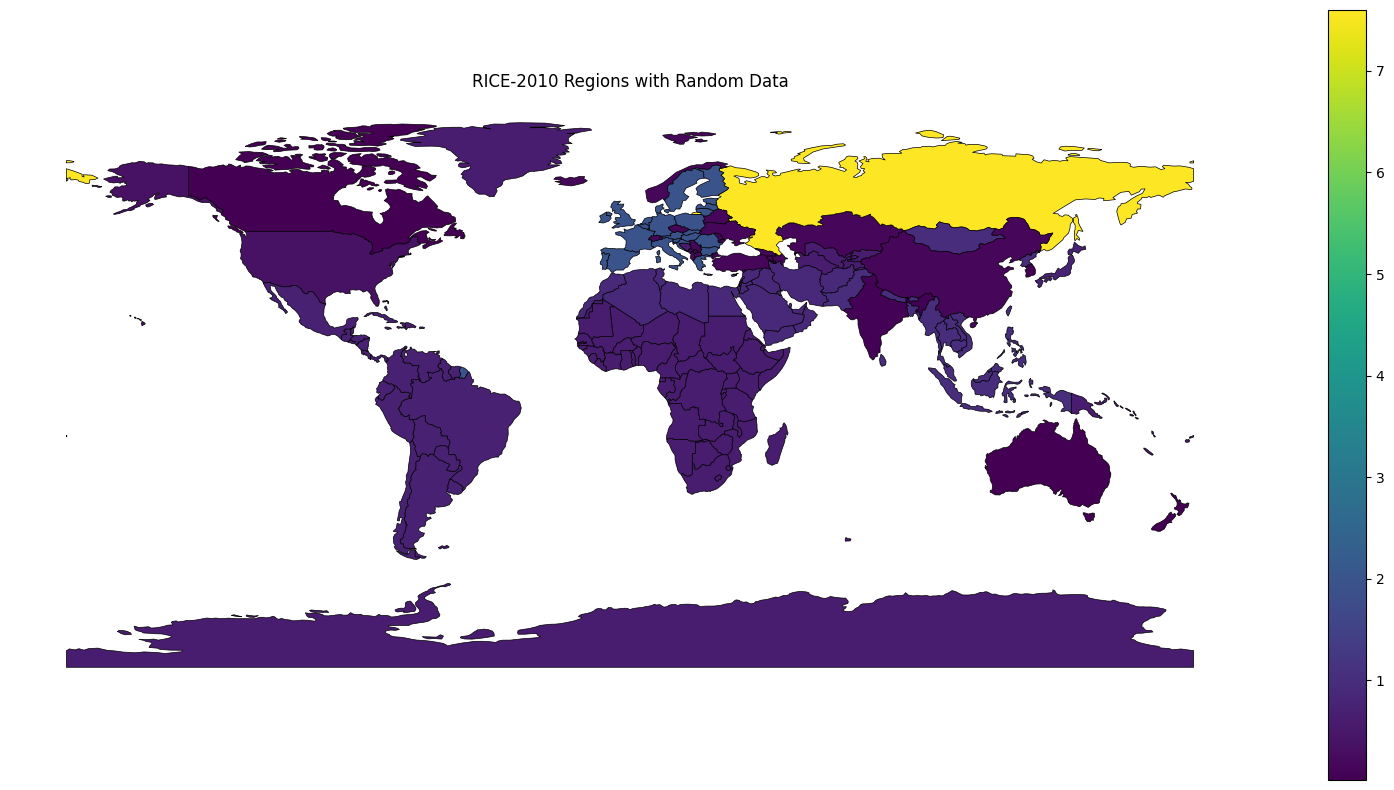

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

RICE_regions = {
    'USA': ['United States of America'],
    'EU': ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
           'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
           'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal',
           'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom'],
    'JPN': ['Japan'],
    'RUS': ['Russia'],
    'EUR': ['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Georgia',
            'Iceland', 'Kazakhstan', 'Kosovo', 'Macedonia', 'Moldova', 'Montenegro', 'Norway',
            'Serbia', 'Switzerland', 'Turkey', 'Ukraine', 'Czechia', 'North Macedonia'],
    'CHN': ['China'],
    'IND': ['India'],
    'MEA': ['Afghanistan', 'Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan',
            'Kuwait', 'Lebanon', 'Libya', 'Morocco', 'Oman', 'Qatar', 'Saudi Arabia', 'Syria',
            'Tunisia', 'United Arab Emirates', 'Yemen'],
    'AFR': ['Sub-Saharan Africa', 'Liberia', 'Niger', 'Botswana', 'Palestine', 'Tajikistan', 'Senegal',
            'Gabon', 'Uzbekistan', 'Chad', 'Eq. Guinea', 'Greenland', 'Somalia', "Côte d'Ivoire", 'Kenya',
           'S. Sudan', 'Ethiopia', 'Tanzania', 'Vanuatu', 'Gambia', 'Antarctica',
            'Kyrgyzstan', 'eSwatini', 'Djibouti', 'Burkina Faso', 'Zimbabwe', 'Malawi', 'Guinea',
            'Cameroon', 'Fr. S. Antarctic Lands', 'Sierra Leone', 'Lesotho', 'Benin', 'Mali',
            'Central African Rep.', 'Nigeria', 'Guinea-Bissau', 'Eritrea', 'Congo', 'Ghana',
            'Angola', 'Dominican Rep.', 'Rwanda', 'Solomon Is.', 'Turkmenistan', 'Fiji', 'South Africa',
            'Namibia', 'Bosnia and Herz.', 'Puerto Rico', 'Mozambique', 'Timor-Leste', 'Uganda', 'Togo',
            'Madagascar', 'Burundi', 'Papua New Guinea', 'Mauritania', 'New Caledonia', 'Dem. Rep. Congo',
            'Somaliland', 'Sudan', 'N. Cyprus', 'Zambia', 'Falkland Is.', 'W. Sahara'],
    'LAC': ['Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bolivia',
            'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic',
            'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
            'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Saint Kitts and Nevis',
            'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago',
            'Uruguay', 'Venezuela'],
    'OTH': ['Australia', 'Canada', 'New Zealand', 'South Korea'],
    'ASI': ['Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia',
            'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Pakistan', 'Philippines',
            'Singapore', 'Sri Lanka', 'Taiwan', 'Thailand', 'Vietnam']
}



def get_rice_region(country):
    for region, countries in RICE_regions.items():
        if country in countries:
            return region
    return 'Others'

#to check for all the countries in use
print("Mismatched country names:")
mismatched_countries = set(world['name']) - set(country for countries in RICE_regions.values() for country in countries)
print(mismatched_countries)

country_mapping = {country: region for region, countries in RICE_regions.items() for country in countries}
world['rice_region'] = world['name'].map(country_mapping)


#world['rice_region'] = world['name'].apply(get_rice_region)

#np.random.seed(42)
#random_data = {region: np.random.random() for region in RICE_regions}
random_data = {'USA': 0.3745401188473625, 
 'EU': 1.9507143064099162, 
 'JPN': 0.7319939418114051, 
 'RUS': 7.5986584841970366,
'EUR': 0.15601864044243652, 
'CHN': 0.15599452033620265,
 'IND': 0.05808361216819946, 
 'MEA': 0.8661761457749352, 
 'AFR': 0.6011150117432088, 
 'LAC': 0.7080725777960455, 
 'OTH': 0.020584494295802447, 
 'ASI': 0.9699098521619943}

world['rice_value'] = world['rice_region'].map(random_data)

fig, ax = plt.subplots(1, figsize=(20, 10))
world.plot(column='rice_value', ax=ax, cmap='viridis', linewidth=0.5, edgecolor='black', legend=True)
ax.set_title('RICE-2010 Regions with Random Data')
ax.axis('off')
plt.show()
